# TLdetect

An implementation of a convolutional neural network to detect the state of traffic lights in images. The states are red, green, yellow and no traffic light. Using the **tensorflow** framework.

### Importing packages

In [24]:
import tensorflow as tf
import pandas as pd
import os
import random
from scipy import misc

In [ ]:
# TODO
# Extracting the dataset
import tarfile
with tarfile.open('data/object-dataset.tar.gz', "r:gz") as file:
    file.extractall('data')

### Pre-processing

Loading the images and labels and treating the dataset to fit better on our model. Note that the images won't be loaded right now, only their file names, in order to save memory and avoid bottlenecks and errors.

In [6]:
# Loading the labels
header = ['File', 'x_min', 'y_min', 'x_max', 'y_max', 'occluded', 'label', 'properties']
raw_labels = pd.read_csv('data/object-dataset/labels.csv', 
                         sep=' ', header=None, names=header)

# Extracting just the labels with traffic lights
tl_labels = raw_labels[raw_labels['label'] == 'trafficLight']

In [29]:
# Loading the images. In reality, just their names
raw_files = pd.DataFrame(os.listdir('data/object-dataset/'), columns=['File'])
images = raw_files[raw_files['File'] != 'labels.csv']

# Dividing the datasets
num_images = len(images)

In [16]:
img = misc.imread('data/object-dataset/test.png')

In [17]:
img

array([[[ 86,  40,  42],
        [ 73,  27,  29],
        [ 73,  29,  30],
        ..., 
        [235, 253, 253],
        [236, 254, 254],
        [236, 254, 254]],

       [[ 80,  38,  40],
        [ 71,  29,  30],
        [ 71,  31,  32],
        ..., 
        [235, 253, 253],
        [236, 254, 254],
        [236, 254, 254]],

       [[ 49,  15,  16],
        [ 47,  13,  12],
        [ 45,  13,  14],
        ..., 
        [236, 254, 254],
        [236, 254, 254],
        [236, 254, 254]],

       ..., 
       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ..., 
        [ 88,  86,  87],
        [ 83,  81,  82],
        [ 80,  79,  77]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ..., 
        [ 91,  89,  90],
        [ 88,  86,  87],
        [ 86,  84,  85]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ..., 
        [ 92,  90,  93],
        [ 91,  89,  90],
        [ 91,  89,

In [18]:
img.shape

(1200, 1920, 3)

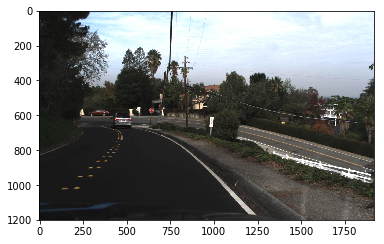

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()